In [7]:
import torch
import torch.nn.functional as F
import clip as clip
import cav_utils
import matplotlib.pyplot as plt
from CAV import *

In [8]:
device = "cuda"
# ViT-B/16  or ViT-B/32
clipmodel, preprocess = clip.load("ViT-B/16", device=device, download_root='download/')

In [9]:
img_path = "pic/ILSVRC2012_val_00006083.JPEG"
texts = ["a yorkshire terrier is laughing on the meadow.",]
text_index = -1
caption = texts

In [10]:
text_processed, text_tokens_decoded = preprocess_tokens(caption)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
inputs, img_show = cav_utils.read_imgs(img_path, device=device)
img_embedding = clipmodel.encode_image(inputs)
text_embedding = clipmodel.encode_text(text_processed)

In [11]:
forward_function = Forward_Function(clipmodel, device)
CAV_map = CAV_img(clipmodel, inputs, text_embedding, forward_function, text_index=text_index)

<Figure size 3000x1400 with 0 Axes>

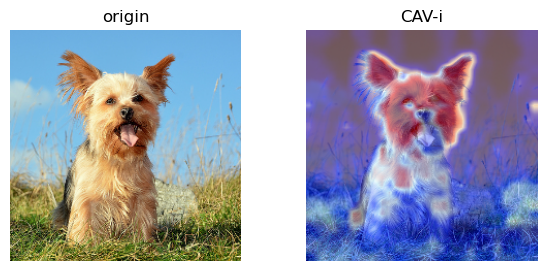

In [12]:
outImg = cav_utils.show_vit_explanation(img_show, CAV_map, color='Seismic')
plt.figure(figsize=(7, 3)), plt.subplot(1, 2, 1), plt.imshow(img_show), plt.axis('off'), plt.title('origin')
plt.subplot(1, 2, 2), plt.imshow(outImg),plt.axis('off'), plt.title('CAV-i')
CAV_result, CAV_html_result = text_explainer(clipmodel, CAV_text, texts, [text_index], forward_function=text_per_layer, ori_img_embedding=img_embedding,  return_visualization=True,)